In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from nltk.stem.snowball import SnowballStemmer
# import wikipedia
from PIL import Image
# import time


In [2]:
data = pd.read_csv('phishing_site_urls.csv')

In [3]:
data.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [4]:
data.isna().sum()

URL      0
Label    0
dtype: int64

In [5]:
data.info

<bound method DataFrame.info of                                                       URL Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3       mail.printakid.com/www.online.americanexpress....   bad
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[549346 rows x 2 columns]>

In [6]:
label_counts = pd.DataFrame(data.Label.value_counts())
label_counts

,Label
good,392924
bad,156422


In [7]:
fig = px.bar(label_counts, x=label_counts.index, y=label_counts.Label)
fig.show()

In [8]:
x = data[['URL']].copy()
y = data.Label.copy()

In [9]:
x

,URL
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,mail.printakid.com/www.online.americanexpress....
4,thewhiskeydregs.com/wp-content/themes/widescre...
...,...
549341,23.227.196.215/
549342,apple-checker.org/
549343,apple-iclods.org/
549344,apple-uptoday.org/


In [10]:
y

0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
549341    bad
549342    bad
549343    bad
549344    bad
549345    bad
Name: Label, Length: 549346, dtype: object

In [11]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [16]:
tokenizer.tokenize(data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [17]:
data['tokens'] = data.URL.map(lambda t: tokenizer.tokenize(t)) 

In [18]:
data

,URL,Label,tokens
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."
...,...,...,...
549341,23.227.196.215/,bad,[]
549342,apple-checker.org/,bad,"[apple, checker, org]"
549343,apple-iclods.org/,bad,"[apple, iclods, org]"
549344,apple-uptoday.org/,bad,"[apple, uptoday, org]"


In [19]:
data.sample(5)

,URL,Label,tokens
331489,facebook.com/people/David-Klamer/1394180887,good,"[facebook, com, people, David, Klamer]"
194764,grandmidwest.com/,good,"[grandmidwest, com]"
14502,www.albaylasanart.com/demo/data1/fr/fr/paypal/...,bad,"[www, albaylasanart, com, demo, data, fr, fr, ..."
192405,genforum.genealogy.com/authier/,good,"[genforum, genealogy, com, authier]"
486395,raznyi-content.ru/wp-includes/pomo/idx.php,bad,"[raznyi, content, ru, wp, includes, pomo, idx,..."


In [20]:
stemmer = SnowballStemmer("english")

In [21]:
data['stems'] = data['tokens'].map(lambda l: [stemmer.stem(i) for i in l])

In [22]:
data.sample(20)

,URL,Label,tokens,stems
23395,tam.resgate.com.br.tc/,bad,"[tam, resgate, com, br, tc]","[tam, resgat, com, br, tc]"
236207,rugbyunion.wikia.com/wiki/Ireland_national_rug...,good,"[rugbyunion, wikia, com, wiki, Ireland, nation...","[rugbyunion, wikia, com, wiki, ireland, nation..."
499043,vmuz.org/,bad,"[vmuz, org]","[vmuz, org]"
229214,pipl.com/directory/name/Wertheimer/Randy,good,"[pipl, com, directory, name, Wertheimer, Randy]","[pipl, com, directori, name, wertheim, randi]"
45381,www997.paypal.co.uk.46543.ssl-430.mx/js/webapp...,bad,"[www, paypal, co, uk, ssl, mx, js, webapps, uk...","[www, paypal, co, uk, ssl, mx, js, webapp, uk,..."
417991,pubcrawler.com/Template/dsp_restaurant_zoom.cf...,good,"[pubcrawler, com, Template, dsp, restaurant, z...","[pubcrawl, com, templat, dsp, restaur, zoom, c..."
477461,youtube.com/watch?v=oj8jJS4CjwI,good,"[youtube, com, watch, v, oj, jJS, CjwI]","[youtub, com, watch, v, oj, jjs, cjwi]"
116894,outdoordesign.com.au/uploads/res/cp.php,bad,"[outdoordesign, com, au, uploads, res, cp, php]","[outdoordesign, com, au, upload, res, cp, php]"
244072,stuffaboutnames.com/archer/writers.htm,good,"[stuffaboutnames, com, archer, writers, htm]","[stuffaboutnam, com, archer, writer, htm]"
397069,mylife.com/jennifermhopkins,good,"[mylife, com, jennifermhopkins]","[mylif, com, jennifermhopkin]"


In [23]:
data['ftext'] = data['stems'].map(lambda l: ' '.join(l))

In [24]:
data.sample(10)

,URL,Label,tokens,stems,ftext
247150,theplaylist.blogspot.com/2009/01/best-of-decad...,good,"[theplaylist, blogspot, com, best, of, decade,...","[theplaylist, blogspot, com, best, of, decad, ...",theplaylist blogspot com best of decad playlis...
409648,onlinehmp.com/summit/location.htm,good,"[onlinehmp, com, summit, location, htm]","[onlinehmp, com, summit, locat, htm]",onlinehmp com summit locat htm
432946,soccerbase.com/tournaments/tournament.sd?comp_...,good,"[soccerbase, com, tournaments, tournament, sd,...","[soccerbas, com, tournament, tournament, sd, c...",soccerbas com tournament tournament sd comp id
30939,www.stairliftprices.net/0/www.Tesco.com.04/log...,bad,"[www, stairliftprices, net, www, Tesco, com, l...","[www, stairliftpric, net, www, tesco, com, log...",www stairliftpric net www tesco com login html
19539,besworca.co.uk/6570058/aol/index.php,bad,"[besworca, co, uk, aol, index, php]","[besworca, co, uk, aol, index, php]",besworca co uk aol index php
33490,www.koraborukai.org/ibs5/secure/banking/com/cg...,bad,"[www, koraborukai, org, ibs, secure, banking, ...","[www, koraborukai, org, ib, secur, bank, com, ...",www koraborukai org ib secur bank com cgi bin ...
244886,switzerlandinn.com/,good,"[switzerlandinn, com]","[switzerlandinn, com]",switzerlandinn com
166791,dsgnbyprsnl.yolasite.com/,good,"[dsgnbyprsnl, yolasite, com]","[dsgnbyprsnl, yolasit, com]",dsgnbyprsnl yolasit com
191156,freeurdubookspdf.blogspot.com/,good,"[freeurdubookspdf, blogspot, com]","[freeurdubookspdf, blogspot, com]",freeurdubookspdf blogspot com
377208,linkedin.com/pub/joe-hautem/12/87a/829,good,"[linkedin, com, pub, joe, hautem, a]","[linkedin, com, pub, joe, hautem, a]",linkedin com pub joe hautem a


In [25]:
data1=data

In [26]:
data1

,URL,Label,tokens,stems,ftext
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
...,...,...,...,...,...
549341,23.227.196.215/,bad,[],[],
549342,apple-checker.org/,bad,"[apple, checker, org]","[appl, checker, org]",appl checker org
549343,apple-iclods.org/,bad,"[apple, iclods, org]","[appl, iclod, org]",appl iclod org
549344,apple-uptoday.org/,bad,"[apple, uptoday, org]","[appl, uptoday, org]",appl uptoday org


In [27]:
bad_sites = data[data.Label == 'bad']
good_sites = data[data.Label == 'good']

In [28]:
bad_sites.head(8)

,URL,Label,tokens,stems,ftext
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
5,smilesvoegol.servebbs.org/voegol.php,bad,"[smilesvoegol, servebbs, org, voegol, php]","[smilesvoegol, servebb, org, voegol, php]",smilesvoegol servebb org voegol php
6,premierpaymentprocessing.com/includes/boleto-2...,bad,"[premierpaymentprocessing, com, includes, bole...","[premierpaymentprocess, com, includ, boleto, v...",premierpaymentprocess com includ boleto via php
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad,"[myxxxcollection, com, v, js, jih, bpd, com, d...","[myxxxcollect, com, v, js, jih, bpd, com, do, ...",myxxxcollect com v js jih bpd com do do l popu...


In [29]:
good_sites.head(8)

,URL,Label,tokens,stems,ftext
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...
18237,¾5092,good,[],[],
18238,esxcc.com/js/index.htm?us.battle.net/login/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, l...",esxcc com js index htm us battl net login en r...
18239,esxcc.com/js/index.htm?us.battle.net/login/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, l...",esxcc com js index htm us battl net login en r...


In [30]:
data = good_sites.ftext
data.reset_index(drop=True, inplace=True)
data

0         esxcc com js index htm us battl net noghn en r...
1         www eira nvinip nch wv ydah ye u rt u g m i xz...
2         www institutocgr coo web media syqvem dk ij r ...
3                                               y ko d l qt
4         ruta fm com imag as vie i cf b vc f d b g sd v...
                                ...                        
392919      youthleaguesusa com potomacsocc tournament html
392920                                         zip code com
392921                               owen edu news releas p
392922                safesecureweb com egal index asp item
392923                  yurika otakuthon com reg main pl en
Name: ftext, Length: 392924, dtype: object

In [31]:
data = good_sites.ftext

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()


In [33]:
feature = cv.fit_transform(data1.ftext) #transform all text which we tokenize and stemed

In [34]:
feature

<549346x350837 sparse matrix of type '<class 'numpy.int64'>'
	with 3676066 stored elements in Compressed Sparse Row format>

In [35]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
from sklearn.model_selection import train_test_split # spliting the data between feature and target
trainX, testX, trainY, testY = train_test_split(feature, data1.Label)

In [37]:
# create lr object
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
lr = LogisticRegression()

In [38]:
lr.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [39]:
lr.score(testX,testY)

0.9641174628832725

In [40]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9780198976235956
Testing Accuracy : 0.9641174628832725

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.93     36559
        Good       0.99      0.96      0.98    100778

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

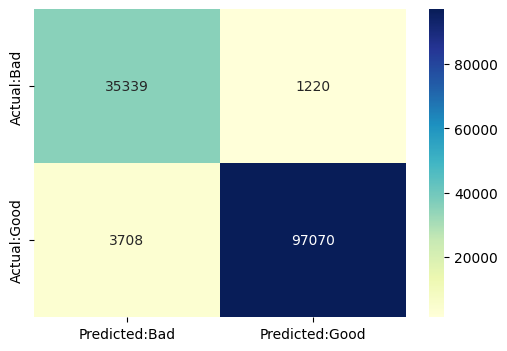

In [41]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import seaborn as sns  
import matplotlib.pyplot as plt 
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [42]:
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray 

In [43]:
trainX, testX, trainY, testY = train_test_split(data1.URL, data1.Label)

In [44]:
pipeline_ls.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [45]:
pipeline_ls.score(testX,testY) 

0.9664329350429964

Training Accuracy : 0.9802844112628608
Testing Accuracy : 0.9664329350429964

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37221
        Good       0.99      0.97      0.98    100116

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

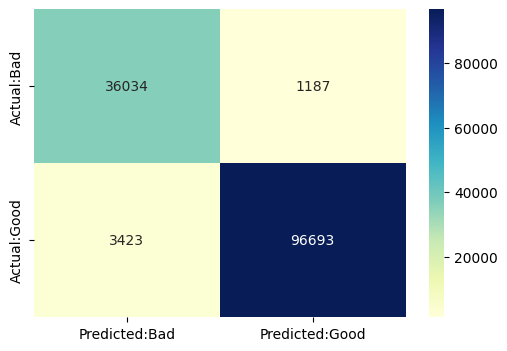

In [46]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [47]:
import pickle# use to dump model 
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [48]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9664329350429964


In [49]:
arr=[]
narr=[]
string = input()
arr.append(string)
import re
pattern = re.compile(r'^https://')
new_string = re.sub(pattern, '',string)
narr.append(new_string)
r=loaded_model.predict(narr)
print(r)

mgit.ac.in
['good']
